# Capstone Project — The Battle of Neighborhoods 

**Finding suitable restaurants for tourist for their tastes and which neighborhoods of İzmir, Turkey have vegetarian friendly restaurants**

### * Importing all the necessary Libraries

In [ ]:
import numpy as np 
import pandas as pd 
!conda install -c conda-forge lxml --yes

In [75]:
# import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import requests
import json
from bs4 import BeautifulSoup
import matplotlib.cm as cm
import matplotlib.colors as colors

%matplotlib inline
print('Packages installed  :)')

Packages installed  :)


In [76]:
# Get the neighborhood data using beautiful soup 
url1='https://www.atlasbig.com/tr/izmirin-mahalleleri'
result1 = requests.get(url1)
data_html1 = BeautifulSoup(result1.content)

In [77]:
# Now we will read the data into a Pandas Dataframe
soup1 = BeautifulSoup(str(data_html1))
neigh1 = soup1.find('table')
table_str1 = str(neigh1.extract())

In [78]:
df2 = pd.read_html(table_str1)[0]
df2.head()

,Mahalle,İlçe,Nüfus,Yüzölçümü (km2)
0,Yalı Mahallesi,Karşıyaka,37.053,1834
1,Erzene Mahallesi,Bornova,36.012,16885
2,Kazımdirik Mahallesi,Bornova,35.318,5004
3,Manavkuyu Mahallesi,Bayraklı,32.068,1287
4,Bostanlı Mahallesi,Karşıyaka,31.738,1489


In [79]:
df2.value_counts()

Mahalle                    İlçe        Nüfus    Yüzölçümü (km2)
Şirinkapı Mahallesi        Buca        4.763    1421               1
Fevzi Çakmak Mahallesi     Balçova     11.411   375                1
Fuat Edip Baksı Mahallesi  Bayraklı    12.284   676                1
Fırat Mahallesi            Buca        20.415   1215               1
Gazi Mahallesi             Gaziemir    14.688   694                1
                                                                  ..
Reis Mahallesi             Karabağlar  10.068   182                1
Sahilevleri Mahallesi      Narlıdere   1.851    2394               1
Sakarya Mahallesi          Konak       911.000  4                  1
Salih Omurtak Mahallesi    Karabağlar  6.332    644                1
1.Kadriye Mahallesi        Konak       7.600    223                1
Length: 328, dtype: int64

In [80]:
df2.isnull().sum()

Mahalle            0
İlçe               0
Nüfus              0
Yüzölçümü (km2)    0
dtype: int64

df2.head()

**Changing the name of columns to English**

In [82]:
df2 = df2.rename(columns={"Mahalle": "Neigbourhood", "İlçe": "District"})
df2.head()

,Neigbourhood,District,Nüfus,Yüzölçümü (km2)
0,Yalı Mahallesi,Karşıyaka,37.053,1834
1,Erzene Mahallesi,Bornova,36.012,16885
2,Kazımdirik Mahallesi,Bornova,35.318,5004
3,Manavkuyu Mahallesi,Bayraklı,32.068,1287
4,Bostanlı Mahallesi,Karşıyaka,31.738,1489


**Dropping unnecessary columns**

In [ ]:
df2=df2.drop(columns=['Nüfus', 'Yüzölçümü (km2)'])
df2.head()

**Folium library will be used to visualize geographic details of Izmir and its boroughs**

In [84]:
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!conda install -c conda-forge folium=0.7.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab
usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


**Shape of our data**

In [85]:
df2.shape

(328, 2)

**The latitude and longitude values of Izmir are fetched by using geopy library**

In [86]:
geolocator = Nominatim(user_agent="Izmir_explorer")

df2['Major_Dist_Coord']= df2['Neigbourhood'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df2[['Latitude', 'Longitude']] = df2['Major_Dist_Coord'].apply(pd.Series)

df2.drop(['Major_Dist_Coord'], axis=1, inplace=True)


In [87]:
df2.head()

,Neigbourhood,District,Latitude,Longitude
0,Yalı Mahallesi,Karşıyaka,40.895358,29.220435
1,Erzene Mahallesi,Bornova,38.469727,27.229410
2,Kazımdirik Mahallesi,Bornova,38.455146,27.212553
3,Manavkuyu Mahallesi,Bayraklı,38.461078,27.188203
4,Bostanlı Mahallesi,Karşıyaka,38.458185,27.097839


**Now we can visualize the map of Izmir with boroughs and districts superimposed on top by using their latitude and longitude value.**

In [660]:
#map of Turkey using latitude and longitude values
map_izmir = folium.Map(location=[latitude, longitude], zoom_start=12)


# add markers to map
for lat, lng, st, district in zip(df2['Latitude'], df2['Longitude'],df2['Neigbourhood'], df2['District']):
    label = '{}, {}'.format(district, st)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='#0a5669',
        fill=True,
        fill_color='#11af80',
        fill_opacity=0.7,
        parse_html=False).add_to(map_izmir)  
    
map_izmir

**It looks like there is a problem. There are places with the same neighborhood and districts name all around Turkey. I have to eliminate those places that are not in Izmir. I am doing it by finding the maximum and minimum Longitude and Latitude values of IZmir. This method will ensure me that I am getting exact locations of Izmir's neighborhoods**

In [88]:
Latitude_df=pd.DataFrame(df2['Latitude'].unique())

Finding maximum and minimum value of Latitude

In [89]:
max_value_Latitude = df2['Latitude'].max()
min_value_Latitude = df2['Latitude'].min()

In [661]:
max_value_Latitude 

41.3571169

In [91]:
min_value_Latitude

36.863888

**Finding maximum and minimum value of Latitude**

In [92]:
max_value_Longitude = df2['Longitude'].max()
min_value_Longitude = df2['Longitude'].min()

In [93]:
max_value_Longitude

42.4740114

In [94]:
min_value_Longitude

26.35468491189441

**Coordinates of Izmir region**

In [95]:
coor = pd.DataFrame(np.array([[38.503445150000005, 38.31810955, 27.260804924467173,26.97511495932831]]),
                   columns=['max_value_Latitude', 'min_value_Latitude', 'max_value_Longitude','min_value_Longitude'])

In [96]:
coor

,max_value_Latitude,min_value_Latitude,max_value_Longitude,min_value_Longitude
0,38.503445,38.31811,27.260805,26.975115


In [97]:
df2.shape

(328, 4)

In [98]:
df3 = df2[(df2['Latitude'] >= 38.31811) & (df2['Latitude'] <= 38.503445)]

In [99]:
df3.shape

(183, 4)

In [100]:
df3 = df3[(df3['Longitude'] >= 26.975115) & (df3['Longitude'] <= 27.260805)]

In [101]:
df3.shape

(178, 4)

Total number of neighbourhoods went from 328 down to 178

In [102]:
df3.head()

,Neigbourhood,District,Latitude,Longitude
1,Erzene Mahallesi,Bornova,38.469727,27.229410
2,Kazımdirik Mahallesi,Bornova,38.455146,27.212553
3,Manavkuyu Mahallesi,Bayraklı,38.461078,27.188203
4,Bostanlı Mahallesi,Karşıyaka,38.458185,27.097839
10,Mansuroğlu Mahallesi,Bayraklı,38.455163,27.189147


**The total number of neighbourhoods by their districts. There are 9 districts in Izmir city.**

In [103]:
df3['District'].value_counts()

Konak         68
Karabağlar    38
Karşıyaka     17
Buca          15
Bayraklı      12
Bornova       11
Narlıdere      7
Balçova        6
Gaziemir       4
Name: District, dtype: int64

In [104]:
df3.reset_index(drop=True, inplace=True)
df3.head()

,Neigbourhood,District,Latitude,Longitude
0,Erzene Mahallesi,Bornova,38.469727,27.229410
1,Kazımdirik Mahallesi,Bornova,38.455146,27.212553
2,Manavkuyu Mahallesi,Bayraklı,38.461078,27.188203
3,Bostanlı Mahallesi,Karşıyaka,38.458185,27.097839
4,Mansuroğlu Mahallesi,Bayraklı,38.455163,27.189147


**Same steps above getting the latitude and longitude values of Izmir to visualize its neighbourhoods on the map**

In [105]:
address = 'Izmir'

geolocator = Nominatim(user_agent="Izmir_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Izmir are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Izmir are 38.4147331, 27.1434119.


In [631]:

map_izmir = folium.Map(location=[latitude, longitude], zoom_start=12)


# add markers to map
for lat, lng, st, district in zip(df3['Latitude'], df3['Longitude'], df3['Neigbourhood'], df3['District']):
    label = '{}, {}'.format(district, st)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='#0a5669',
        fill=True,
        fill_color='#11af80',
        fill_opacity=0.7,
        parse_html=False).add_to(map_izmir)  
    
map_izmir

**Nice! Now we can see all the neighbourhoods of Izmir visualized on the map.**

# Part 2 Clustering Neighborhoods in Izmir

In [107]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge geopy --yes


In [108]:
!conda install -c conda-forge geopy --yes
d

Solving environment: ...working... done

# All requested packages already installed.



In [109]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

In [114]:
df3.head()

,Neigbourhood,District,Latitude,Longitude
0,Erzene Mahallesi,Bornova,38.469727,27.229410
1,Kazımdirik Mahallesi,Bornova,38.455146,27.212553
2,Manavkuyu Mahallesi,Bayraklı,38.461078,27.188203
3,Bostanlı Mahallesi,Karşıyaka,38.458185,27.097839
4,Mansuroğlu Mahallesi,Bayraklı,38.455163,27.189147


In [115]:
df2.head()

,Neigbourhood,District,Latitude,Longitude
0,Yalı Mahallesi,Karşıyaka,40.895358,29.220435
1,Erzene Mahallesi,Bornova,38.469727,27.229410
2,Kazımdirik Mahallesi,Bornova,38.455146,27.212553
3,Manavkuyu Mahallesi,Bayraklı,38.461078,27.188203
4,Bostanlı Mahallesi,Karşıyaka,38.458185,27.097839


In [116]:
df3.reset_index(drop=True, inplace=True)
df3.head()

,Neigbourhood,District,Latitude,Longitude
0,Erzene Mahallesi,Bornova,38.469727,27.229410
1,Kazımdirik Mahallesi,Bornova,38.455146,27.212553
2,Manavkuyu Mahallesi,Bayraklı,38.461078,27.188203
3,Bostanlı Mahallesi,Karşıyaka,38.458185,27.097839
4,Mansuroğlu Mahallesi,Bayraklı,38.455163,27.189147


In [117]:
df3.shape

(178, 4)

In [118]:
df3.loc[0, 'District']

'Bornova'

In [674]:

print('There are {} districts in our Izmir dataset.'.format(len(df3['District'].unique())))

There are 9 districts in our Izmir dataset.


**Getting borough's latitude and longitude values again**

In [119]:
izmir_data=df3
neighborhood_latitude = izmir_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = izmir_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = izmir_data.loc[0, 'District'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Bornova are 38.4697273, 27.2294098.


**Next step is to make use of the Foursquare API to explore the neighborhoods and segment them**


In [113]:
CLIENT_ID = '*' 
CLIENT_SECRET = '*'
VERSION = '20180605' 
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: GSBPKOLYKWIXWODEAEDMKMO0H0DHPRUQ1RLLKXT4OFGS0HJG
CLIENT_SECRET:PILEGZLMDCJW3RD4CBK1CAWYRWQFVAADYHAMI3QMDHENWRBD


**We are going to use GET to request from foursquare. We name this url. Then, we set the limit as 100 venues withina a adius of 500 meters.**

In [284]:
LIMIT = 100

radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=GSBPKOLYKWIXWODEAEDMKMO0H0DHPRUQ1RLLKXT4OFGS0HJG&client_secret=PILEGZLMDCJW3RD4CBK1CAWYRWQFVAADYHAMI3QMDHENWRBD&v=20180605&ll=38.4697273,27.2294098&radius=500&limit=100'

**Send the GET request and examine the resutls**

In [285]:
results = requests.get(url).json()

**All the information is in the items key. Before we proceed, we create get_category_type function to help us extracting the category of venue.**



In [286]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

**Now we are ready to clean the json and structure it into a pandas dataframe.**



In [287]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Topraktan Pastanesi,Dessert Shop,38.467961,27.231423
1,Tarlabaşı Altınyıldız Klüp Lokali,Restaurant,38.469114,27.226342
2,Egemar,Grocery Store,38.467922,27.232350
3,Uğur Pide Kebap,Turkish Restaurant,38.471499,27.231193
4,evka 3 yürüyüş parkuru,Athletics & Sports,38.468531,27.228981


**And how many venues were returned by Foursquare?**

In [288]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

17 venues were returned by Foursquare.


**Exploring Neighborhoods in Izmir**

Let's create a function to get all the boroughs in Istanbul

In [289]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

**Now write the code to run the above function on each neighborhood and create a new dataframe called izmir_venues**


In [290]:
izmir_venues = getNearbyVenues(names=izmir_data['Neigbourhood'],
                                   latitudes=izmir_data['Latitude'],
                                   longitudes=izmir_data['Longitude']
                                  )
izmir_venues.head()

Erzene Mahallesi
Kazımdirik Mahallesi
Manavkuyu Mahallesi
Bostanlı Mahallesi
Mansuroğlu Mahallesi
Şemikler Mahallesi
Örnekköy Mahallesi
Evka 3 Mahallesi
Günaltay Mahallesi
Rafet Paşa Mahallesi
Çamlıkule Mahallesi
Kozağaç Mahallesi
Dedebaşı Mahallesi
Buca Koop Mahallesi
Güzelyalı Mahallesi
Yamanlar Mahallesi
Onur Mahallesi
Onur Mahallesi
Ufuk Mahallesi
Adatepe Mahallesi
Tepekule Mahallesi
Bozyaka Mahallesi
Evka 4 Mahallesi
Kuruçeşme Mahallesi
Mavişehir Mahallesi
Bahriye Üçok Mahallesi
Cengizhan Mahallesi
Postacılar Mahallesi
Korutürk Mahallesi
R.Şevket İnce Mahallesi
Fuat Edip Baksı Mahallesi
Aksoy Mahallesi
Murat Reis Mahallesi
Çalıkuşu Mahallesi
Refet Bele Mahallesi
Donanmacı Mahallesi
Peker Mahallesi
Ali Fuat Cebesoy Mahallesi
Ergene Mahallesi
Bahar Mahallesi
Gülyaka Mahallesi
Çetin Emeç Mahallesi
Çamlıpınar Mahallesi
İhsan Alyanak Mahallesi
Doğanay Mahallesi
Atilla Mahallesi
Zafertepe Mahallesi
Reis Mahallesi
Çiçek Mahallesi
Vali Rahmi Bey Mahallesi
Arap Hasan Mahallesi
Sevgi Mahall

,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Erzene Mahallesi,38.469727,27.22941,Topraktan Pastanesi,38.467961,27.231423,Dessert Shop
1,Erzene Mahallesi,38.469727,27.22941,Tarlabaşı Altınyıldız Klüp Lokali,38.469114,27.226342,Restaurant
2,Erzene Mahallesi,38.469727,27.22941,Egemar,38.467922,27.232350,Grocery Store
3,Erzene Mahallesi,38.469727,27.22941,Uğur Pide Kebap,38.471499,27.231193,Turkish Restaurant
4,Erzene Mahallesi,38.469727,27.22941,evka 3 yürüyüş parkuru,38.468531,27.228981,Athletics & Sports


**Let's check the size of the resulting dataframe**

In [291]:
print(izmir_venues.shape)
izmir_venues.head()

(6618, 7)


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Erzene Mahallesi,38.469727,27.22941,Topraktan Pastanesi,38.467961,27.231423,Dessert Shop
1,Erzene Mahallesi,38.469727,27.22941,Tarlabaşı Altınyıldız Klüp Lokali,38.469114,27.226342,Restaurant
2,Erzene Mahallesi,38.469727,27.22941,Egemar,38.467922,27.232350,Grocery Store
3,Erzene Mahallesi,38.469727,27.22941,Uğur Pide Kebap,38.471499,27.231193,Turkish Restaurant
4,Erzene Mahallesi,38.469727,27.22941,evka 3 yürüyüş parkuru,38.468531,27.228981,Athletics & Sports


**Let's check how many venues were returned for each borough and sort them in count**


In [669]:
venues_by_borough = izmir_venues.groupby('Borough').count().reset_index()
venues_by_borough['Count'] = venues_by_borough['Venue']
venues_by_borough = venues_by_borough.drop(['Borough Latitude', 'Borough Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude','Venue Category'], axis=1)
venues_by_borough = venues_by_borough.sort_values('Count').reset_index(drop=True)
venues_by_borough.tail(20)

,Borough,Count
154,Nergiz Mahallesi,75
155,Rafet Paşa Mahallesi,75
156,Arap Hasan Mahallesi,78
157,Kemal Reis Mahallesi,79
158,Kahramanlar Mahallesi,82
159,Tersane Mahallesi,83
160,Güngör Mahallesi,83
161,Güneşli Mahallesi,86
162,Mehmet Ali Akman Mahallesi,87
163,Çahabey Mahallesi,88


It seems okay. Konak and Bostanlı are one of the most populated neigbourhoods in Izmir and they reach the limit of 100.

**Now we can create a dataframe that consists of restaurants**


In [327]:
izmir_venues_only_restaurant = izmir_venues[izmir_venues['Venue Category'].str.contains('Restaurant', 'Lokanta')].reset_index(drop=True)
izmir_venues_only_restaurant.index = np.arange(1, len(izmir_venues_only_restaurant )+1)

**We can list all restaurants based upon menu style**

In [552]:
print (izmir_venues_only_restaurant['Venue Category'].value_counts())

Turkish Restaurant                 252
Restaurant                         126
Seafood Restaurant                 112
Fast Food Restaurant                65
Kebab Restaurant                    64
Turkish Home Cooking Restaurant     41
Doner Restaurant                    28
Kokoreç Restaurant                  28
Comfort Food Restaurant             18
Mediterranean Restaurant            10
Middle Eastern Restaurant            6
Halal Restaurant                     6
Italian Restaurant                   6
Sushi Restaurant                     5
African Restaurant                   5
Kumru Restaurant                     4
Cambodian Restaurant                 3
New American Restaurant              3
Modern European Restaurant           2
American Restaurant                  2
Eastern European Restaurant          2
Vegetarian / Vegan Restaurant        2
Vietnamese Restaurant                2
Greek Restaurant                     1
Bosnian Restaurant                   1
Chinese Restaurant       

In [670]:
print('There are {} unique categories.'.format(len(izmir_venues_only_restaurant['Venue Category'].unique())))

There are 30 unique categories.


In [294]:
Izmir_5_Dist_Venues_Top10 = izmir_venues_only_restaurant['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
Izmir_5_Dist_Venues_Top10=Izmir_5_Dist_Venues_Top10.reset_index()
Izmir_5_Dist_Venues_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Izmir_5_Dist_Venues_Top10

,Venue_Category,Frequency
0,Turkish Restaurant,252
1,Restaurant,126
2,Seafood Restaurant,112
3,Fast Food Restaurant,65
4,Kebab Restaurant,64
5,Turkish Home Cooking Restaurant,41
6,Doner Restaurant,28
7,Kokoreç Restaurant,28
8,Comfort Food Restaurant,18
9,Mediterranean Restaurant,10


**Visualizing top 10 venue category**

In [ ]:
!python -m pip install seaborn
import seaborn as sns
from matplotlib import pyplot as plt

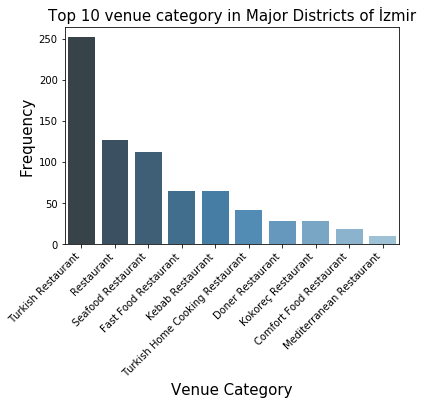

<Figure size 2160x1080 with 0 Axes>

In [682]:
s=sns.barplot(x="Venue_Category", y="Frequency", data=Izmir_5_Dist_Venues_Top10, palette="Blues_d")
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('Top 10 venue category in Major Districts of İzmir', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues1.png", dpi=300, facecolor='gray')
fig = plt.figure(figsize=(30,15))
plt.show()

**Comment:** Obiviously, Turkish restaurants are the most popular one alongside with Kebab, Doner, Kokorec. Since Izmir is a coastal Aegean city, Seafood restaurants are popular too. Some of the seafood restaurants might be vegetarian or vegan restaurants. The second venue category 'Restaurant' could be any type of restaurants available. We are not sure about it yet.

In [316]:
izmir_venues_only_restaurant['Venue Category'].value_counts()


Turkish Restaurant                 252
Restaurant                         126
Seafood Restaurant                 112
Fast Food Restaurant                65
Kebab Restaurant                    64
Turkish Home Cooking Restaurant     41
Doner Restaurant                    28
Kokoreç Restaurant                  28
Comfort Food Restaurant             18
Mediterranean Restaurant            10
Middle Eastern Restaurant            6
Halal Restaurant                     6
Italian Restaurant                   6
Sushi Restaurant                     5
African Restaurant                   5
Kumru Restaurant                     4
Cambodian Restaurant                 3
New American Restaurant              3
Modern European Restaurant           2
American Restaurant                  2
Eastern European Restaurant          2
Vegetarian / Vegan Restaurant        2
Vietnamese Restaurant                2
Greek Restaurant                     1
Bosnian Restaurant                   1
Chinese Restaurant       

In [317]:
Izmir_Venues_restaurant = izmir_venues_only_restaurant.groupby(['Borough'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())


In [318]:
Izmir_Venues_restaurant

Borough
2. Kadriye Mahallesi              1
26 Ağustos Mahallesi              3
Abdi İpekçi Mahallesi             2
Adatepe Mahallesi                 1
Adnan Süvari Mahallesi            4
                                 ..
İsmet Paşa Mahallesi              3
İzkent Mahallesi                  4
Şehit Nedim Tuğaltay Mahallesi    1
Şemikler Mahallesi                2
Şirinkapı Mahallesi               2
Name: Venue Category, Length: 136, dtype: int64

In [332]:
izmir_venues_only_restaurant['Venue Category'].value_counts()

Turkish Restaurant                 252
Restaurant                         126
Seafood Restaurant                 112
Fast Food Restaurant                65
Kebab Restaurant                    64
Turkish Home Cooking Restaurant     41
Doner Restaurant                    28
Kokoreç Restaurant                  28
Comfort Food Restaurant             18
Mediterranean Restaurant            10
Middle Eastern Restaurant            6
Halal Restaurant                     6
Italian Restaurant                   6
Sushi Restaurant                     5
African Restaurant                   5
Kumru Restaurant                     4
Cambodian Restaurant                 3
New American Restaurant              3
Modern European Restaurant           2
American Restaurant                  2
Eastern European Restaurant          2
Vegetarian / Vegan Restaurant        2
Vietnamese Restaurant                2
Greek Restaurant                     1
Bosnian Restaurant                   1
Chinese Restaurant       

 **Analyzing Each Neighborhood**

Analysis of each Neighborhood with venues informations

In [349]:
# one hot encoding
izmir_venues_only_restaurant_onehot = pd.get_dummies(izmir_venues_only_restaurant[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
izmir_venues_only_restaurant_onehot['Neighborhood'] = izmir_venues_only_restaurant['Borough'] 

# move neighborhood column to the first column
fixed_columns = [izmir_venues_only_restaurant_onehot.columns[-1]] + list(izmir_venues_only_restaurant_onehot.columns[:-1])
izmir_venues_only_restaurant_onehot = izmir_venues_only_restaurant_onehot[fixed_columns]

print(izmir_venues_only_restaurant)
izmir_venues_only_restaurant_onehot.head()

                  Borough  Borough Latitude  Borough Longitude  \
1        Erzene Mahallesi         38.469727          27.229410   
2        Erzene Mahallesi         38.469727          27.229410   
3        Erzene Mahallesi         38.469727          27.229410   
4    Kazımdirik Mahallesi         38.455146          27.212553   
5    Kazımdirik Mahallesi         38.455146          27.212553   
..                    ...               ...                ...   
795        Uğur Mahallesi         38.416479          27.132587   
796        Uğur Mahallesi         38.416479          27.132587   
797        Uğur Mahallesi         38.416479          27.132587   
798        Uğur Mahallesi         38.416479          27.132587   
799        Uğur Mahallesi         38.416479          27.132587   

                                 Venue  Venue Latitude  Venue Longitude  \
1    Tarlabaşı Altınyıldız Klüp Lokali       38.469114        27.226342   
2                      Uğur Pide Kebap       38.471499   

,Neighborhood,African Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Cambodian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,...,Middle Eastern Restaurant,Modern European Restaurant,New American Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Turkish Home Cooking Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
1,Erzene Mahallesi,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Erzene Mahallesi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Erzene Mahallesi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Kazımdirik Mahallesi,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,Kazımdirik Mahallesi,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [333]:
# one hot encoding
izmir_onehot = pd.get_dummies(izmir_venues_only_restaurant[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
izmir_onehot['Borough'] = izmir_venues_only_restaurant['Borough'] 

# move neighborhood column to the first column
list_column = izmir_onehot.columns.tolist()
number_column = int(list_column.index('Borough'))
list_column = [list_column[number_column]] + list_column[:number_column] + list_column[number_column+1:] 
izmir_onehot = izmir_onehot[list_column]

izmir_onehot.head()

,Borough,African Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Cambodian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,...,Middle Eastern Restaurant,Modern European Restaurant,New American Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Turkish Home Cooking Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
1,Erzene Mahallesi,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Erzene Mahallesi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Erzene Mahallesi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Kazımdirik Mahallesi,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,Kazımdirik Mahallesi,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [358]:
# one hot encoding
izmir_onehot = pd.get_dummies(izmir_venues_only_restaurant[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
izmir_onehot['Borough'] = izmir_venues_only_restaurant['Borough'] 

# move neighborhood column to the first column
col_name="Borough"
first_col = izmir_onehot.pop(col_name)
izmir_onehot.insert(0, col_name, first_col)
izmir_onehot

,Borough,African Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Cambodian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,...,Middle Eastern Restaurant,Modern European Restaurant,New American Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Turkish Home Cooking Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
1,Erzene Mahallesi,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Erzene Mahallesi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Erzene Mahallesi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Kazımdirik Mahallesi,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,Kazımdirik Mahallesi,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,Uğur Mahallesi,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
796,Uğur Mahallesi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
797,Uğur Mahallesi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
798,Uğur Mahallesi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


And let's examine the new dataframe size.



In [350]:
izmir_venues_only_restaurant_onehot.shape

(799, 31)

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [359]:
izmir_venues_only_restaurant_onehot_grouped = izmir_onehot.groupby('Borough').mean().reset_index()
izmir_venues_only_restaurant_onehot_grouped

,Borough,African Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Cambodian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,...,Middle Eastern Restaurant,Modern European Restaurant,New American Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Turkish Home Cooking Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,2. Kadriye Mahallesi,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.000000,0.0,0.0
1,26 Ağustos Mahallesi,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00,0.333333,0.0,0.0,0.333333,0.0,0.0
2,Abdi İpekçi Mahallesi,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.000000,0.0,0.0
3,Adatepe Mahallesi,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00,0.000000,0.0,1.0,0.000000,0.0,0.0
4,Adnan Süvari Mahallesi,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.25,0.000000,0.0,0.0,0.250000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,İsmet Paşa Mahallesi,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,...,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.333333,0.0,0.0
132,İzkent Mahallesi,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00,0.250000,0.0,0.0,0.500000,0.0,0.0
133,Şehit Nedim Tuğaltay Mahallesi,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,1.000000,0.0,0.0
134,Şemikler Mahallesi,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.000000,0.0,0.0


In [570]:
izmir_venues_only_restaurant_onehot_grouped=izmir_venues_only_restaurant_onehot_grouped.drop(columns=['Cambodian Restaurant'])

Let's print each neighborhood along with the top 5 most common venues

In [571]:
num_top_venues = 5
for hood in izmir_venues_only_restaurant_onehot_grouped ['Borough']:
    print("----"+hood+"----")
    temp = izmir_venues_only_restaurant_onehot_grouped[izmir_venues_only_restaurant_onehot_grouped ['Borough'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----2. Kadriye Mahallesi----
                             venue  freq
0                 Kebab Restaurant   1.0
1               African Restaurant   0.0
2                Kosher Restaurant   0.0
3               Turkish Restaurant   0.0
4  Turkish Home Cooking Restaurant   0.0


----26 Ağustos Mahallesi----
                venue  freq
0  Turkish Restaurant  0.33
1  Seafood Restaurant  0.33
2    Kebab Restaurant  0.33
3  African Restaurant  0.00
4   Kosher Restaurant  0.00


----Abdi İpekçi Mahallesi----
                             venue  freq
0                 Kebab Restaurant   1.0
1               African Restaurant   0.0
2                Kosher Restaurant   0.0
3               Turkish Restaurant   0.0
4  Turkish Home Cooking Restaurant   0.0


----Adatepe Mahallesi----
                             venue  freq
0  Turkish Home Cooking Restaurant   1.0
1               African Restaurant   0.0
2              American Restaurant   0.0
3               Turkish Restaurant   0.0
4              

                             venue  freq
0               Turkish Restaurant  0.33
1                       Restaurant  0.33
2  Turkish Home Cooking Restaurant  0.11
3          Comfort Food Restaurant  0.11
4               Mexican Restaurant  0.11


----Erzene Mahallesi----
                 venue  freq
0   Turkish Restaurant  0.33
1   Seafood Restaurant  0.33
2           Restaurant  0.33
3   African Restaurant  0.00
4  American Restaurant  0.00


----Esenlik Mahallesi----
                             venue  freq
0               Turkish Restaurant   0.5
1                       Restaurant   0.5
2               African Restaurant   0.0
3              American Restaurant   0.0
4  Turkish Home Cooking Restaurant   0.0


----Faik Paşa Mahallesi----
                     venue  freq
0       Turkish Restaurant   0.4
1       African Restaurant   0.2
2  Comfort Food Restaurant   0.2
3         Kebab Restaurant   0.2
4        Kosher Restaurant   0.0


----Ferahlı Mahallesi----
                       

4        Kosher Restaurant  0.00


----Peker Mahallesi----
                             venue  freq
0                       Restaurant   1.0
1               African Restaurant   0.0
2              American Restaurant   0.0
3               Turkish Restaurant   0.0
4  Turkish Home Cooking Restaurant   0.0


----Postacılar Mahallesi----
                             venue  freq
0               Turkish Restaurant   1.0
1               African Restaurant   0.0
2              American Restaurant   0.0
3  Turkish Home Cooking Restaurant   0.0
4                 Sushi Restaurant   0.0


----Rafet Paşa Mahallesi----
                             venue  freq
0               Turkish Restaurant  0.31
1               Kokoreç Restaurant  0.23
2                 Kumru Restaurant  0.15
3  Turkish Home Cooking Restaurant  0.08
4               Seafood Restaurant  0.08


----Refet Bele Mahallesi----
                      venue  freq
0      Fast Food Restaurant  0.50
1  Mediterranean Restaurant  0.25
2       

4  Turkish Home Cooking Restaurant   0.0


----Çimentepe Mahallesi----
                  venue  freq
0    Turkish Restaurant  0.56
1    Kokoreç Restaurant  0.11
2            Restaurant  0.11
3  Fast Food Restaurant  0.11
4    Italian Restaurant  0.11


----Örnekköy Mahallesi----
                             venue  freq
0               Turkish Restaurant   1.0
1               African Restaurant   0.0
2              American Restaurant   0.0
3  Turkish Home Cooking Restaurant   0.0
4                 Sushi Restaurant   0.0


----Ülkü Mahallesi----
                     venue  freq
0       Seafood Restaurant  0.67
1       Turkish Restaurant  0.17
2  Comfort Food Restaurant  0.17
3       African Restaurant  0.00
4        Kosher Restaurant  0.00


----Üçkuyular Mahallesi----
                 venue  freq
0   Turkish Restaurant   0.4
1   Seafood Restaurant   0.4
2           Restaurant   0.2
3   African Restaurant   0.0
4  American Restaurant   0.0


----İhsan Alyanak Mahallesi----
             

**Let's put that into a pandas dataframe**

First, let's write a function to sort the venues in descending order.

In [572]:
#First, let's write a function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

**Now let's create the new dataframe and display the top 10 venues for each neighborhood.**

In [573]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Borough'] = izmir_venues_only_restaurant_onehot_grouped['Borough']

for ind in np.arange(izmir_venues_only_restaurant_onehot_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(izmir_venues_only_restaurant_onehot_grouped.iloc[ind, :], num_top_venues)



In [574]:

neighborhoods_venues_sorted

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,2. Kadriye Mahallesi,Kebab Restaurant,Turkish Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Empanada Restaurant
1,26 Ağustos Mahallesi,Kebab Restaurant,Seafood Restaurant,Turkish Restaurant,Italian Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant
2,Abdi İpekçi Mahallesi,Kebab Restaurant,Turkish Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Empanada Restaurant
3,Adatepe Mahallesi,Turkish Home Cooking Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant
4,Adnan Süvari Mahallesi,Kebab Restaurant,Restaurant,Fast Food Restaurant,Turkish Restaurant,Italian Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant
...,...,...,...,...,...,...,...,...,...,...,...
131,İsmet Paşa Mahallesi,Kebab Restaurant,Turkish Restaurant,Comfort Food Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Doner Restaurant,Eastern European Restaurant,Empanada Restaurant
132,İzkent Mahallesi,Turkish Restaurant,Seafood Restaurant,Kokoreç Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant
133,Şehit Nedim Tuğaltay Mahallesi,Turkish Restaurant,Vegetarian / Vegan Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Empanada Restaurant
134,Şemikler Mahallesi,Kebab Restaurant,Kokoreç Restaurant,Italian Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant


In [575]:
neighborhoods_venues_sorted['1st Most Common Venue'].value_counts()

Turkish Restaurant                 47
Restaurant                         25
Seafood Restaurant                 20
Kebab Restaurant                   17
Fast Food Restaurant                7
Turkish Home Cooking Restaurant     4
New American Restaurant             3
Mediterranean Restaurant            2
Vegetarian / Vegan Restaurant       2
Doner Restaurant                    2
Kokoreç Restaurant                  2
Comfort Food Restaurant             2
Kosher Restaurant                   1
African Restaurant                  1
Halal Restaurant                    1
Name: 1st Most Common Venue, dtype: int64

In [576]:

neighborhoods_venues_sorted['2nd Most Common Venue'].value_counts()

Turkish Restaurant                 33
Vegetarian / Vegan Restaurant      22
Restaurant                         20
Kebab Restaurant                   18
Seafood Restaurant                 15
Fast Food Restaurant                9
Turkish Home Cooking Restaurant     4
Halal Restaurant                    4
Comfort Food Restaurant             4
Kokoreç Restaurant                  3
Sushi Restaurant                    2
Mediterranean Restaurant            1
Middle Eastern Restaurant           1
Name: 2nd Most Common Venue, dtype: int64

In [577]:
neighborhoods_venues_sorted['3rd Most Common Venue'].value_counts()

Vegetarian / Vegan Restaurant      20
Turkish Restaurant                 18
American Restaurant                17
Seafood Restaurant                 13
Fast Food Restaurant               10
Restaurant                         10
Italian Restaurant                 10
Turkish Home Cooking Restaurant     7
Kebab Restaurant                    7
Kokoreç Restaurant                  5
Doner Restaurant                    5
Comfort Food Restaurant             4
Mediterranean Restaurant            3
African Restaurant                  2
Greek Restaurant                    1
Halal Restaurant                    1
Middle Eastern Restaurant           1
Sushi Restaurant                    1
Kumru Restaurant                    1
Name: 3rd Most Common Venue, dtype: int64

# Cluster Neighborhoods

Run k-means to cluster the neighborhood into 7 clusters.

k-means clustering is a method of unsupervised learning, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean.

The elbow method helps us to find the optimal k of k-means. In our case, I will run K-Means to cluster the neighbourboroughs into 7 clusters.

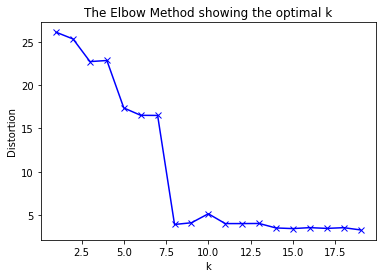

In [688]:
from scipy.spatial.distance import cdist

distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(izmir_venues_only_restaurant_onehot_grouped_clustering)
    distortions.append(sum(np.min(cdist(izmir_venues_only_restaurant_onehot_grouped_clustering, kmeanModel.cluster_centers_, 'canberra'), axis=1)) / izmir_venues_only_restaurant_onehot_grouped_clustering.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [579]:
# set number of clusters
kclusters = 7

izmir_venues_only_restaurant_onehot_grouped_clustering = izmir_venues_only_restaurant_onehot_grouped.drop('Borough', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(izmir_venues_only_restaurant_onehot_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 6, 0, 4, 5, 3, 6, 2, 3, 5])

In [580]:
izmir_venues_only_restaurant_onehot_grouped_clustering

,African Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Empanada Restaurant,Fast Food Restaurant,...,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,New American Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Turkish Home Cooking Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.00,0.333333,0.0,0.0,0.333333,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,1.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.25,...,0.0,0.0,0.0,0.0,0.25,0.000000,0.0,0.0,0.250000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.333333,0.0
132,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.00,0.250000,0.0,0.0,0.500000,0.0
133,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,1.000000,0.0
134,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.000000,0.0


In [617]:
neighborhoods_venues_sorted=neighborhoods_venues_sorted.drop(columns='Cluster Labels')

In [582]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted


,Cluster Labels,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,2. Kadriye Mahallesi,Kebab Restaurant,Turkish Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Empanada Restaurant
1,6,26 Ağustos Mahallesi,Kebab Restaurant,Seafood Restaurant,Turkish Restaurant,Italian Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant
2,0,Abdi İpekçi Mahallesi,Kebab Restaurant,Turkish Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Empanada Restaurant
3,4,Adatepe Mahallesi,Turkish Home Cooking Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant
4,5,Adnan Süvari Mahallesi,Kebab Restaurant,Restaurant,Fast Food Restaurant,Turkish Restaurant,Italian Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant
...,...,...,...,...,...,...,...,...,...,...,...,...
131,3,İsmet Paşa Mahallesi,Kebab Restaurant,Turkish Restaurant,Comfort Food Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Doner Restaurant,Eastern European Restaurant,Empanada Restaurant
132,3,İzkent Mahallesi,Turkish Restaurant,Seafood Restaurant,Kokoreç Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant
133,1,Şehit Nedim Tuğaltay Mahallesi,Turkish Restaurant,Vegetarian / Vegan Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Empanada Restaurant
134,0,Şemikler Mahallesi,Kebab Restaurant,Kokoreç Restaurant,Italian Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant


Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood

In [583]:
izmir_data_merged = izmir_data
izmir_data_merged= izmir_data_merged.join(neighborhoods_venues_sorted.set_index('Borough'), on='Neigbourhood')
izmir_data_merged # check the last columns!
izmir_data_merged.tail()

,Neigbourhood,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
173,İmariye Mahallesi,Konak,38.412828,27.143011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174,Konak Mahallesi,Konak,38.418978,27.129977,6.0,Turkish Restaurant,Seafood Restaurant,Restaurant,Turkish Home Cooking Restaurant,Kebab Restaurant,Halal Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant
175,Kestelli Mahallesi,Konak,38.417034,27.134507,6.0,Seafood Restaurant,Turkish Restaurant,Turkish Home Cooking Restaurant,Kebab Restaurant,Restaurant,Doner Restaurant,Halal Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant
176,Hurşidiye Mahallesi,Konak,38.420808,27.139764,3.0,Turkish Restaurant,Kebab Restaurant,Turkish Home Cooking Restaurant,Doner Restaurant,Seafood Restaurant,Restaurant,Halal Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant
177,Uğur Mahallesi,Konak,38.416479,27.132587,6.0,Seafood Restaurant,Turkish Restaurant,Kebab Restaurant,Restaurant,Halal Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant


In [585]:
izmir_data_merged_1=izmir_data_merged.dropna()

In [587]:
null_data

,Neigbourhood,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Evka 3 Mahallesi,Bornova,38.467232,27.247704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,Evka 4 Mahallesi,Bornova,38.493431,27.213750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,Bahriye Üçok Mahallesi,Karşıyaka,38.380386,27.101432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,R.Şevket İnce Mahallesi,Bayraklı,38.478977,27.172004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,Fuat Edip Baksı Mahallesi,Bayraklı,38.468470,27.161252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,Çiçek Mahallesi,Bayraklı,38.468991,27.171273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,2. İnönü Mahallesi,Narlıdere,38.362468,27.008645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,Fahrettin Altay Mahallesi,Karabağlar,38.391089,27.068901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,Aydoğdu Mahallesi,Buca,38.404582,27.203882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,Meriç Mahallesi,Bornova,38.424583,27.186103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**We get null values for some of the data. Missingness is not severe and it may be possible that datas are missing at random. To be able to continue with cluster analysis, dropping the null data can be an option.**

In [588]:
izmir_data_merged.shape

(178, 15)

Let's confirm the new size

In [589]:
izmir_data_merged_1.shape

(139, 15)

Removing duplicates

In [590]:
izmir_data_merged_1.drop_duplicates(subset=['Latitude', 'Longitude'])

,Neigbourhood,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Erzene Mahallesi,Bornova,38.469727,27.229410,6.0,Seafood Restaurant,Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant
1,Kazımdirik Mahallesi,Bornova,38.455146,27.212553,2.0,Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant
2,Manavkuyu Mahallesi,Bayraklı,38.461078,27.188203,3.0,Turkish Restaurant,Kebab Restaurant,Seafood Restaurant,Restaurant,Fast Food Restaurant,Halal Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant
3,Bostanlı Mahallesi,Karşıyaka,38.458185,27.097839,6.0,Seafood Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Kumru Restaurant,Kebab Restaurant,Turkish Home Cooking Restaurant,New American Restaurant,Fast Food Restaurant,American Restaurant
4,Mansuroğlu Mahallesi,Bayraklı,38.455163,27.189147,3.0,Turkish Restaurant,Restaurant,Kebab Restaurant,Seafood Restaurant,Turkish Home Cooking Restaurant,Bosnian Restaurant,Comfort Food Restaurant,Doner Restaurant,Kokoreç Restaurant,Fast Food Restaurant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Vezirağa Mahallesi,Konak,38.409199,27.148208,4.0,New American Restaurant,Comfort Food Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Doner Restaurant,Eastern European Restaurant
174,Konak Mahallesi,Konak,38.418978,27.129977,6.0,Turkish Restaurant,Seafood Restaurant,Restaurant,Turkish Home Cooking Restaurant,Kebab Restaurant,Halal Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant
175,Kestelli Mahallesi,Konak,38.417034,27.134507,6.0,Seafood Restaurant,Turkish Restaurant,Turkish Home Cooking Restaurant,Kebab Restaurant,Restaurant,Doner Restaurant,Halal Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant
176,Hurşidiye Mahallesi,Konak,38.420808,27.139764,3.0,Turkish Restaurant,Kebab Restaurant,Turkish Home Cooking Restaurant,Doner Restaurant,Seafood Restaurant,Restaurant,Halal Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant


In [591]:
izmir_data_merged_1.reset_index(drop=True, inplace=True)
izmir_data_merged_1.head()

,Neigbourhood,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Erzene Mahallesi,Bornova,38.469727,27.229410,6.0,Seafood Restaurant,Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant
1,Kazımdirik Mahallesi,Bornova,38.455146,27.212553,2.0,Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant
2,Manavkuyu Mahallesi,Bayraklı,38.461078,27.188203,3.0,Turkish Restaurant,Kebab Restaurant,Seafood Restaurant,Restaurant,Fast Food Restaurant,Halal Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant
3,Bostanlı Mahallesi,Karşıyaka,38.458185,27.097839,6.0,Seafood Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Kumru Restaurant,Kebab Restaurant,Turkish Home Cooking Restaurant,New American Restaurant,Fast Food Restaurant,American Restaurant
4,Mansuroğlu Mahallesi,Bayraklı,38.455163,27.189147,3.0,Turkish Restaurant,Restaurant,Kebab Restaurant,Seafood Restaurant,Turkish Home Cooking Restaurant,Bosnian Restaurant,Comfort Food Restaurant,Doner Restaurant,Kokoreç Restaurant,Fast Food Restaurant


The new size after removing duplicates

In [592]:
izmir_venues_only_restaurant_onehot_grouped.shape

(136, 29)

izmir_data_merged_1.groupby('Cluster Labels').first().reset_index()


# Map of Cluster Results

Finally, let's visualize the resulting clusters

In [706]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.jet(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(izmir_data_merged_1['Latitude'], izmir_data_merged_1['Longitude'], izmir_data_merged_1['Neigbourhood'], izmir_data_merged_1['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters),
    
       
map_clusters

**Analysis
Examining the resulting Clusters**

Now there are clusters avalaible. We can examine each cluster and determine the venue categories that differs from each cluster. 

In [635]:
cluster0=izmir_data_merged_1.loc[izmir_data_merged_1['Cluster Labels'] == 0, izmir_data_merged_1.columns[[0] + list(range(5, izmir_data_merged_1.shape[1]))]]
cluster0

,Neigbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Şemikler Mahallesi,Kebab Restaurant,Kokoreç Restaurant,Italian Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant
9,Çamlıkule Mahallesi,Kebab Restaurant,Turkish Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Empanada Restaurant
14,Yamanlar Mahallesi,Kebab Restaurant,Restaurant,Italian Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant
38,İhsan Alyanak Mahallesi,Kebab Restaurant,Sushi Restaurant,Fast Food Restaurant,Italian Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant
57,Tahsin Yazıcı Mahallesi,Kebab Restaurant,Turkish Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Empanada Restaurant
61,Abdi İpekçi Mahallesi,Kebab Restaurant,Turkish Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Empanada Restaurant
67,2. Kadriye Mahallesi,Kebab Restaurant,Turkish Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Empanada Restaurant
111,Trakya Mahallesi,Kebab Restaurant,Fast Food Restaurant,Turkish Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant
133,Yamanlar Mahallesi,Kebab Restaurant,Restaurant,Italian Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant


**Cluster 0 kebab domination :)**

In [645]:
count = cluster0.groupby(['1st Most Common Venue', '2nd Most Common Venue','3rd Most Common Venue']).size() 
print(count)  

1st Most Common Venue  2nd Most Common Venue  3rd Most Common Venue
Kebab Restaurant       Fast Food Restaurant   Turkish Restaurant       1
                       Kokoreç Restaurant     Italian Restaurant       1
                       Restaurant             Italian Restaurant       2
                       Sushi Restaurant       Fast Food Restaurant     1
                       Turkish Restaurant     American Restaurant      4
dtype: int64


In [596]:
izmir_data_merged_1['1st Most Common Venue'].value_counts()

Turkish Restaurant                 48
Restaurant                         25
Seafood Restaurant                 20
Kebab Restaurant                   18
Fast Food Restaurant                8
Turkish Home Cooking Restaurant     4
New American Restaurant             3
Mediterranean Restaurant            2
Vegetarian / Vegan Restaurant       2
Doner Restaurant                    2
Kokoreç Restaurant                  2
Comfort Food Restaurant             2
Kosher Restaurant                   1
Halal Restaurant                    1
African Restaurant                  1
Name: 1st Most Common Venue, dtype: int64

In [597]:
izmir_data_merged_1['2nd Most Common Venue'].value_counts()

Turkish Restaurant                 33
Vegetarian / Vegan Restaurant      23
Restaurant                         22
Kebab Restaurant                   18
Seafood Restaurant                 15
Fast Food Restaurant                9
Turkish Home Cooking Restaurant     4
Halal Restaurant                    4
Comfort Food Restaurant             4
Kokoreç Restaurant                  3
Sushi Restaurant                    2
Mediterranean Restaurant            1
Middle Eastern Restaurant           1
Name: 2nd Most Common Venue, dtype: int64

In [598]:
izmir_data_merged_1['3rd Most Common Venue'].value_counts()

Vegetarian / Vegan Restaurant      20
Turkish Restaurant                 19
American Restaurant                17
Seafood Restaurant                 14
Italian Restaurant                 11
Fast Food Restaurant               10
Restaurant                         10
Turkish Home Cooking Restaurant     7
Kebab Restaurant                    7
Kokoreç Restaurant                  5
Doner Restaurant                    5
Comfort Food Restaurant             4
Mediterranean Restaurant            3
African Restaurant                  2
Greek Restaurant                    1
Halal Restaurant                    1
Middle Eastern Restaurant           1
Sushi Restaurant                    1
Kumru Restaurant                    1
Name: 3rd Most Common Venue, dtype: int64

In [599]:
izmir_data_merged_1['District'].value_counts()

Konak         55
Karabağlar    28
Karşıyaka     15
Buca          14
Bayraklı       9
Bornova        5
Narlıdere      5
Gaziemir       4
Balçova        4
Name: District, dtype: int64

In [600]:
izmir_data_merged_1['Neigbourhood'].value_counts()

Onur Mahallesi               2
Yamanlar Mahallesi           2
Sevgi Mahallesi              2
Abdi İpekçi Mahallesi        1
Halkapınar Mahallesi         1
                            ..
Arap Hasan Mahallesi         1
Örnekköy Mahallesi           1
Güzelyalı Mahallesi          1
Muhittin Erener Mahallesi    1
Çamtepe Mahallesi            1
Name: Neigbourhood, Length: 136, dtype: int64

**cluster 3 which is the light blue circle on the map has the most neighborhoods. This is due to fact that this particular area is the most popular place to visit for locals in Izmir**

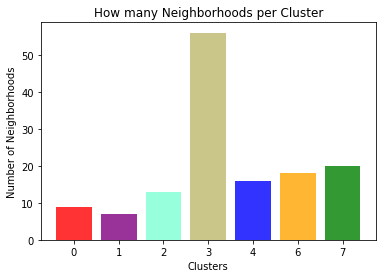

In [707]:
objects = (0,1,2,3,4,6,7)
y_pos = np.arange(len(objects))
performance = izmir_data_merged_1['Cluster Labels'].value_counts().to_frame().sort_index(ascending=True)
perf = performance['Cluster Labels'].tolist()
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['red', 'purple','aquamarine', 'darkkhaki', 'blue', 'orange', 'green', 'lavender'])
plt.xticks(y_pos, objects)
plt.ylabel('Number of Neighborhoods')
plt.xlabel('Clusters')
plt.title('How many Neighborhoods per Cluster')

plt.show()

In [648]:
cluster1=izmir_data_merged_1.loc[izmir_data_merged_1['Cluster Labels'] == 1, izmir_data_merged_1.columns[[0] + list(range(1, izmir_data_merged_1.shape[1]))]]
cluster1

,Neigbourhood,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Örnekköy Mahallesi,Karşıyaka,38.482220,27.108196,1.0,Turkish Restaurant,Vegetarian / Vegan Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Empanada Restaurant
24,Postacılar Mahallesi,Bayraklı,38.482849,27.120339,1.0,Turkish Restaurant,Vegetarian / Vegan Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Empanada Restaurant
53,Muhittin Erener Mahallesi,Bayraklı,38.474047,27.175393,1.0,Turkish Restaurant,Vegetarian / Vegan Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Empanada Restaurant
65,Muammer Akar Mahallesi,Karabağlar,38.391057,27.080873,1.0,Turkish Restaurant,Vegetarian / Vegan Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Empanada Restaurant
75,Emrez Mahallesi,Gaziemir,38.357591,27.131067,1.0,Turkish Restaurant,Vegetarian / Vegan Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Empanada Restaurant
91,Karanfil Mahallesi,Buca,38.392828,27.188676,1.0,Turkish Restaurant,Vegetarian / Vegan Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Empanada Restaurant
130,Şehit Nedim Tuğaltay Mahallesi,Konak,38.414136,27.133227,1.0,Turkish Restaurant,Vegetarian / Vegan Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Empanada Restaurant


In [649]:
cluster2=izmir_data_merged_1.loc[izmir_data_merged_1['Cluster Labels'] == 2, izmir_data_merged_1.columns[[0] + list(range(1, izmir_data_merged_1.shape[1]))]]
cluster2

,Neigbourhood,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Kazımdirik Mahallesi,Bornova,38.455146,27.212553,2.0,Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant
13,Güzelyalı Mahallesi,Konak,38.396184,27.083395,2.0,Restaurant,Turkish Home Cooking Restaurant,Kebab Restaurant,Eastern European Restaurant,Turkish Restaurant,Halal Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant
25,Korutürk Mahallesi,Balçova,38.388037,27.035838,2.0,Restaurant,Seafood Restaurant,Mediterranean Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant
31,Peker Mahallesi,Karabağlar,38.362193,27.125837,2.0,Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant
36,Çetin Emeç Mahallesi,Balçova,38.365681,27.079266,2.0,Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant
70,Bayraklı Mahallesi,Bayraklı,38.462791,27.166402,2.0,Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant
88,Kahramanlar Mahallesi,Konak,38.426983,27.150575,2.0,Restaurant,Fast Food Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant
92,Akın Simav Mahallesi,Konak,38.408705,27.112604,2.0,Restaurant,Seafood Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant
103,Küçükada Mahallesi,Konak,38.410494,27.158036,2.0,Restaurant,Halal Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant
106,Kosova Mahallesi,Konak,38.412452,27.151555,2.0,Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant


In [651]:
cluster3=izmir_data_merged_1.loc[izmir_data_merged_1['Cluster Labels'] == 3, izmir_data_merged_1.columns[[0] + list(range(1, izmir_data_merged_1.shape[1]))]]
cluster3

,Neigbourhood,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Manavkuyu Mahallesi,Bayraklı,38.461078,27.188203,3.0,Turkish Restaurant,Kebab Restaurant,Seafood Restaurant,Restaurant,Fast Food Restaurant,Halal Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant
4,Mansuroğlu Mahallesi,Bayraklı,38.455163,27.189147,3.0,Turkish Restaurant,Restaurant,Kebab Restaurant,Seafood Restaurant,Turkish Home Cooking Restaurant,Bosnian Restaurant,Comfort Food Restaurant,Doner Restaurant,Kokoreç Restaurant,Fast Food Restaurant
7,Günaltay Mahallesi,Karabağlar,38.375775,27.116819,3.0,Turkish Restaurant,Vegetarian / Vegan Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Empanada Restaurant
8,Rafet Paşa Mahallesi,Bornova,38.441494,27.197005,3.0,Turkish Restaurant,Kokoreç Restaurant,Kumru Restaurant,Fast Food Restaurant,Turkish Home Cooking Restaurant,Italian Restaurant,Seafood Restaurant,Eastern European Restaurant,Empanada Restaurant,Vegetarian / Vegan Restaurant
10,Kozağaç Mahallesi,Buca,38.378607,27.173086,3.0,Turkish Restaurant,Restaurant,Doner Restaurant,Fast Food Restaurant,Kokoreç Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant
15,Onur Mahallesi,Balçova,38.391287,27.054088,3.0,Turkish Restaurant,Restaurant,Seafood Restaurant,Fast Food Restaurant,Turkish Home Cooking Restaurant,Doner Restaurant,Kokoreç Restaurant,Vegetarian / Vegan Restaurant,Greek Restaurant,American Restaurant
16,Onur Mahallesi,Bayraklı,38.391287,27.054088,3.0,Turkish Restaurant,Restaurant,Seafood Restaurant,Fast Food Restaurant,Turkish Home Cooking Restaurant,Doner Restaurant,Kokoreç Restaurant,Vegetarian / Vegan Restaurant,Greek Restaurant,American Restaurant
19,Tepekule Mahallesi,Bayraklı,38.465580,27.175522,3.0,Kebab Restaurant,Turkish Restaurant,Restaurant,Doner Restaurant,Italian Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant
27,Murat Reis Mahallesi,Konak,38.403526,27.109364,3.0,Turkish Restaurant,Seafood Restaurant,Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant
28,Çalıkuşu Mahallesi,Karabağlar,38.394480,27.129041,3.0,Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant


In [653]:
count3 = cluster3.groupby(['1st Most Common Venue', '2nd Most Common Venue']).size() 
print(count3)

1st Most Common Venue  2nd Most Common Venue          
Restaurant             Fast Food Restaurant               1
                       Halal Restaurant                   2
                       Mediterranean Restaurant           1
                       Seafood Restaurant                 2
                       Turkish Home Cooking Restaurant    1
                       Turkish Restaurant                 2
                       Vegetarian / Vegan Restaurant      4
dtype: int64


In [654]:
cluster4=izmir_data_merged_1.loc[izmir_data_merged_1['Cluster Labels'] == 4, izmir_data_merged_1.columns[[0] + list(range(1, izmir_data_merged_1.shape[1]))]]
cluster4

,Neigbourhood,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Buca Koop Mahallesi,Buca,38.368124,27.182886,4.0,Doner Restaurant,Kebab Restaurant,Fast Food Restaurant,Kokoreç Restaurant,Turkish Restaurant,Italian Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant
17,Ufuk Mahallesi,Buca,38.402648,27.165371,4.0,Restaurant,Comfort Food Restaurant,Doner Restaurant,Empanada Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant
18,Adatepe Mahallesi,Buca,38.383714,27.189571,4.0,Turkish Home Cooking Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant
20,Bozyaka Mahallesi,Karabağlar,38.386994,27.121269,4.0,Mediterranean Restaurant,Halal Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant
23,Cengizhan Mahallesi,Bayraklı,38.475240,27.165673,4.0,Doner Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Eastern European Restaurant,Empanada Restaurant
37,Çamlıpınar Mahallesi,Buca,38.366459,27.164527,4.0,Vegetarian / Vegan Restaurant,Turkish Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Empanada Restaurant
51,Teleferik Mahallesi,Balçova,38.377179,27.048669,4.0,Comfort Food Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Doner Restaurant,Eastern European Restaurant,Empanada Restaurant
79,Beyazevler Mahallesi,Gaziemir,38.341296,27.144580,4.0,Comfort Food Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Doner Restaurant,Eastern European Restaurant,Empanada Restaurant
83,Limontepe Mahallesi,Karabağlar,38.375421,27.098275,4.0,Halal Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant
84,Saygı Mahallesi,Konak,38.412425,27.175388,4.0,Turkish Home Cooking Restaurant,Fast Food Restaurant,Halal Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant


In [655]:
count4 = cluster4.groupby(['1st Most Common Venue', '2nd Most Common Venue']).size() 
print(count4)

1st Most Common Venue            2nd Most Common Venue        
African Restaurant               Turkish Restaurant               1
Comfort Food Restaurant          Vegetarian / Vegan Restaurant    2
Doner Restaurant                 Kebab Restaurant                 1
                                 Vegetarian / Vegan Restaurant    1
Halal Restaurant                 Vegetarian / Vegan Restaurant    1
Kokoreç Restaurant               Vegetarian / Vegan Restaurant    2
Mediterranean Restaurant         Halal Restaurant                 1
New American Restaurant          Comfort Food Restaurant          2
                                 Vegetarian / Vegan Restaurant    1
Restaurant                       Comfort Food Restaurant          1
Turkish Home Cooking Restaurant  Fast Food Restaurant             1
                                 Vegetarian / Vegan Restaurant    1
Vegetarian / Vegan Restaurant    Turkish Restaurant               1
dtype: int64


In [607]:
izmir_data_merged_1.loc[izmir_data_merged_1['Cluster Labels'] == 5, izmir_data_merged_1.columns[[0] + list(range(1, izmir_data_merged_1.shape[1]))]]

,Neigbourhood,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Dedebaşı Mahallesi,Karşıyaka,38.469826,27.107353,5.0,Fast Food Restaurant,Seafood Restaurant,Restaurant,Doner Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant
21,Kuruçeşme Mahallesi,Buca,38.371435,27.191374,5.0,Restaurant,Kebab Restaurant,Seafood Restaurant,Fast Food Restaurant,Turkish Restaurant,Halal Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant
22,Mavişehir Mahallesi,Karşıyaka,38.470216,27.074966,5.0,Fast Food Restaurant,Sushi Restaurant,Seafood Restaurant,Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant
29,Refet Bele Mahallesi,Karabağlar,38.387487,27.112712,5.0,Fast Food Restaurant,Kebab Restaurant,Mediterranean Restaurant,Italian Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant
39,Doğanay Mahallesi,Karabağlar,38.395664,27.118408,5.0,Seafood Restaurant,Fast Food Restaurant,Kokoreç Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant
42,Reis Mahallesi,Karabağlar,38.396462,27.115795,5.0,Seafood Restaurant,Middle Eastern Restaurant,Restaurant,Kokoreç Restaurant,Turkish Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Greek Restaurant,American Restaurant,Asian Restaurant
45,Sevgi Mahallesi,Karabağlar,38.384677,27.116889,5.0,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant
47,Goncalar Mahallesi,Karşıyaka,38.465092,27.101954,5.0,Fast Food Restaurant,Turkish Restaurant,Turkish Home Cooking Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant
56,Sevgi Mahallesi,Gaziemir,38.384677,27.116889,5.0,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant
59,Koşukavak Mahallesi,Bornova,38.429315,27.199894,5.0,Kebab Restaurant,Seafood Restaurant,Restaurant,Fast Food Restaurant,Kokoreç Restaurant,Turkish Restaurant,Halal Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant


**Cluster6 is dominated by Seafood restaurants and Vegetarian / Vegan Restaurants. So if you are a Vegetarian, these are the neighbourhood you want to visit.**

In [608]:
cluster6=izmir_data_merged_1.loc[izmir_data_merged_1['Cluster Labels'] == 6, izmir_data_merged_1.columns[[0] + list(range(1, izmir_data_merged_1.shape[1]))]]
cluster6

,Neigbourhood,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Erzene Mahallesi,Bornova,38.469727,27.229410,6.0,Seafood Restaurant,Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant
3,Bostanlı Mahallesi,Karşıyaka,38.458185,27.097839,6.0,Seafood Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Kumru Restaurant,Kebab Restaurant,Turkish Home Cooking Restaurant,New American Restaurant,Fast Food Restaurant,American Restaurant
26,Aksoy Mahallesi,Karşıyaka,38.453675,27.108870,6.0,Turkish Restaurant,Turkish Home Cooking Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant
32,Ali Fuat Cebesoy Mahallesi,Karabağlar,38.380457,27.108602,6.0,Seafood Restaurant,Kebab Restaurant,Doner Restaurant,Italian Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Eastern European Restaurant
44,Arap Hasan Mahallesi,Karabağlar,38.400710,27.109956,6.0,Seafood Restaurant,Restaurant,Turkish Restaurant,Turkish Home Cooking Restaurant,Middle Eastern Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Greek Restaurant,American Restaurant,Asian Restaurant
46,Üçkuyular Mahallesi,Karabağlar,38.393574,27.072844,6.0,Seafood Restaurant,Turkish Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant
50,Ulubatlı Mahallesi,Konak,38.409803,27.169766,6.0,Turkish Home Cooking Restaurant,Seafood Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant
71,Çamtepe Mahallesi,Narlıdere,38.389342,27.009759,6.0,Seafood Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant
80,Kibar Mahallesi,Karabağlar,38.374652,27.110681,6.0,Seafood Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant
86,General Kazım Özalp Mahallesi,Karabağlar,38.387856,27.079113,6.0,Seafood Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant


In [611]:
izmir_data_merged_1.groupby('District').first().reset_index()

,District,Neigbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Balçova,Onur Mahallesi,38.391287,27.054088,3.0,Turkish Restaurant,Restaurant,Seafood Restaurant,Fast Food Restaurant,Turkish Home Cooking Restaurant,Doner Restaurant,Kokoreç Restaurant,Vegetarian / Vegan Restaurant,Greek Restaurant,American Restaurant
1,Bayraklı,Manavkuyu Mahallesi,38.461078,27.188203,3.0,Turkish Restaurant,Kebab Restaurant,Seafood Restaurant,Restaurant,Fast Food Restaurant,Halal Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant
2,Bornova,Erzene Mahallesi,38.469727,27.229410,6.0,Seafood Restaurant,Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant
3,Buca,Çamlıkule Mahallesi,38.370173,27.169648,0.0,Kebab Restaurant,Turkish Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Empanada Restaurant
4,Gaziemir,Sevgi Mahallesi,38.384677,27.116889,5.0,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant
5,Karabağlar,Günaltay Mahallesi,38.375775,27.116819,3.0,Turkish Restaurant,Vegetarian / Vegan Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Empanada Restaurant
6,Karşıyaka,Bostanlı Mahallesi,38.458185,27.097839,6.0,Seafood Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Kumru Restaurant,Kebab Restaurant,Turkish Home Cooking Restaurant,New American Restaurant,Fast Food Restaurant,American Restaurant
7,Konak,Güzelyalı Mahallesi,38.396184,27.083395,2.0,Restaurant,Turkish Home Cooking Restaurant,Kebab Restaurant,Eastern European Restaurant,Turkish Restaurant,Halal Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant
8,Narlıdere,Çatalkaya Mahallesi,38.390997,27.001196,5.0,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant


In [612]:
izmir_data_merged_1.groupby('1st Most Common Venue').first().reset_index()

,1st Most Common Venue,Neigbourhood,District,Latitude,Longitude,Cluster Labels,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,African Restaurant,Ballıkuyu Mahallesi,Konak,38.414981,27.151795,4.0,Turkish Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Empanada Restaurant
1,Comfort Food Restaurant,Teleferik Mahallesi,Balçova,38.377179,27.048669,4.0,Vegetarian / Vegan Restaurant,Turkish Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Doner Restaurant,Eastern European Restaurant,Empanada Restaurant
2,Doner Restaurant,Buca Koop Mahallesi,Buca,38.368124,27.182886,4.0,Kebab Restaurant,Fast Food Restaurant,Kokoreç Restaurant,Turkish Restaurant,Italian Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant
3,Fast Food Restaurant,Dedebaşı Mahallesi,Karşıyaka,38.469826,27.107353,5.0,Seafood Restaurant,Restaurant,Doner Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant
4,Halal Restaurant,Limontepe Mahallesi,Karabağlar,38.375421,27.098275,4.0,Vegetarian / Vegan Restaurant,Turkish Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant
5,Kebab Restaurant,Şemikler Mahallesi,Karşıyaka,38.476161,27.095070,0.0,Kokoreç Restaurant,Italian Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant
6,Kokoreç Restaurant,Dolaplıkuyu Mahallesi,Konak,38.412475,27.136863,4.0,Vegetarian / Vegan Restaurant,Italian Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant
7,Kosher Restaurant,Ferahlı Mahallesi,Konak,38.410739,27.163758,3.0,Turkish Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant
8,Mediterranean Restaurant,Bozyaka Mahallesi,Karabağlar,38.386994,27.121269,4.0,Halal Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant
9,New American Restaurant,Lale Mahallesi,Konak,38.406599,27.151035,4.0,Comfort Food Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Doner Restaurant,Eastern European Restaurant


In [613]:
izmir_data_merged_1.groupby('2nd Most Common Venue').first().reset_index()

,2nd Most Common Venue,Neigbourhood,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Comfort Food Restaurant,Ufuk Mahallesi,Buca,38.402648,27.165371,4.0,Restaurant,Doner Restaurant,Empanada Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant
1,Fast Food Restaurant,Gülyaka Mahallesi,Karabağlar,38.393112,27.120905,3.0,Turkish Restaurant,Kokoreç Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant
2,Halal Restaurant,Bozyaka Mahallesi,Karabağlar,38.386994,27.121269,4.0,Mediterranean Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant
3,Kebab Restaurant,Manavkuyu Mahallesi,Bayraklı,38.461078,27.188203,3.0,Turkish Restaurant,Seafood Restaurant,Restaurant,Fast Food Restaurant,Halal Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant
4,Kokoreç Restaurant,Şemikler Mahallesi,Karşıyaka,38.476161,27.095070,0.0,Kebab Restaurant,Italian Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant
5,Mediterranean Restaurant,Osman Aksüner Mahallesi,Karabağlar,38.391205,27.136629,2.0,Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant
6,Middle Eastern Restaurant,Reis Mahallesi,Karabağlar,38.396462,27.115795,5.0,Seafood Restaurant,Restaurant,Kokoreç Restaurant,Turkish Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Greek Restaurant,American Restaurant,Asian Restaurant
7,Restaurant,Erzene Mahallesi,Bornova,38.469727,27.229410,6.0,Seafood Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant
8,Seafood Restaurant,Dedebaşı Mahallesi,Karşıyaka,38.469826,27.107353,5.0,Fast Food Restaurant,Restaurant,Doner Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant
9,Sushi Restaurant,Mavişehir Mahallesi,Karşıyaka,38.470216,27.074966,5.0,Fast Food Restaurant,Seafood Restaurant,Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant


In [614]:
izmir_data_merged_1.groupby('3rd Most Common Venue').first().reset_index()

,3rd Most Common Venue,Neigbourhood,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,African Restaurant,Kocakapı Mahallesi,Konak,38.419621,27.150936,3.0,Turkish Restaurant,Kebab Restaurant,Sushi Restaurant,Halal Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant
1,American Restaurant,Örnekköy Mahallesi,Karşıyaka,38.482220,27.108196,1.0,Turkish Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Empanada Restaurant
2,Comfort Food Restaurant,İsmet Paşa Mahallesi,Konak,38.406885,27.159983,3.0,Kebab Restaurant,Turkish Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Doner Restaurant,Eastern European Restaurant,Empanada Restaurant
3,Doner Restaurant,Kozağaç Mahallesi,Buca,38.378607,27.173086,3.0,Turkish Restaurant,Restaurant,Fast Food Restaurant,Kokoreç Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant
4,Fast Food Restaurant,Buca Koop Mahallesi,Buca,38.368124,27.182886,4.0,Doner Restaurant,Kebab Restaurant,Kokoreç Restaurant,Turkish Restaurant,Italian Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant
5,Greek Restaurant,Umurbey Mahallesi,Konak,38.437728,27.155894,3.0,Turkish Home Cooking Restaurant,Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant
6,Halal Restaurant,Saygı Mahallesi,Konak,38.412425,27.175388,4.0,Turkish Home Cooking Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant
7,Italian Restaurant,Şemikler Mahallesi,Karşıyaka,38.476161,27.095070,0.0,Kebab Restaurant,Kokoreç Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant
8,Kebab Restaurant,Mansuroğlu Mahallesi,Bayraklı,38.455163,27.189147,3.0,Turkish Restaurant,Restaurant,Seafood Restaurant,Turkish Home Cooking Restaurant,Bosnian Restaurant,Comfort Food Restaurant,Doner Restaurant,Kokoreç Restaurant,Fast Food Restaurant
9,Kokoreç Restaurant,Gülyaka Mahallesi,Karabağlar,38.393112,27.120905,3.0,Turkish Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant


In [615]:
izmir_data_merged_1.groupby('4th Most Common Venue').first().reset_index()

,4th Most Common Venue,Neigbourhood,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,African Restaurant,Faik Paşa Mahallesi,Konak,38.419826,27.145332,3.0,Turkish Restaurant,Kebab Restaurant,Comfort Food Restaurant,Seafood Restaurant,Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant
1,American Restaurant,Şemikler Mahallesi,Karşıyaka,38.476161,27.095070,0.0,Kebab Restaurant,Kokoreç Restaurant,Italian Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant
2,Asian Restaurant,Örnekköy Mahallesi,Karşıyaka,38.482220,27.108196,1.0,Turkish Restaurant,Vegetarian / Vegan Restaurant,American Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Empanada Restaurant
3,Comfort Food Restaurant,Ergene Mahallesi,Bornova,38.466666,27.216485,3.0,Restaurant,Turkish Restaurant,Turkish Home Cooking Restaurant,Mexican Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant
4,Doner Restaurant,Dedebaşı Mahallesi,Karşıyaka,38.469826,27.107353,5.0,Fast Food Restaurant,Seafood Restaurant,Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant
5,Eastern European Restaurant,Güzelyalı Mahallesi,Konak,38.396184,27.083395,2.0,Restaurant,Turkish Home Cooking Restaurant,Kebab Restaurant,Turkish Restaurant,Halal Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant
6,Empanada Restaurant,Ufuk Mahallesi,Buca,38.402648,27.165371,4.0,Restaurant,Comfort Food Restaurant,Doner Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant
7,Fast Food Restaurant,Rafet Paşa Mahallesi,Bornova,38.441494,27.197005,3.0,Turkish Restaurant,Kokoreç Restaurant,Kumru Restaurant,Turkish Home Cooking Restaurant,Italian Restaurant,Seafood Restaurant,Eastern European Restaurant,Empanada Restaurant,Vegetarian / Vegan Restaurant
8,Italian Restaurant,Kazımdirik Mahallesi,Bornova,38.455146,27.212553,2.0,Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant
9,Kebab Restaurant,Selvili Mahallesi,Karabağlar,38.377698,27.128829,3.0,Turkish Restaurant,Restaurant,Fast Food Restaurant,Comfort Food Restaurant,Italian Restaurant,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant


# Results and Discussion

The aim of this project was to explore, cluster, and segment the neighborhoods in the city of İzmir and give recommendations to tourists, immigrants, friends , who are vegetarian and coming from the world to visit İzmir, based on the common restaurant categories in different neighborhoods. Turkey is famous for its meat culture and is not quite vegetarian friendly but being an Aegean costal city, İzmir has lots of amazing seafood and vegatarian foods on offer for tourists. We discovered districts and neighbors by applying machine learning tools and tried to find best fits for their needs. To achieve the most common venues in each neighborhood, I employed the k-means clustering algorithm and was able to sort the popular neighborhoods by their types  restaurants and with most Vegan friendly restaurants. 

Here are the some interesting insights which might be useful to travelers as well as people with business interests. 

· Turkish restaurants top the charts of most common venues all districts following by Seafood restaurants

· Konak , Karşıyaka, and Karabağlar have the maximum number of restaurants

· Cluster6 is dominated by Seafood restaurants and Vegetarian / Vegan Restaurants. So if you are a Vegetarian, these are the neighbourhoods that you want to visit. I recommend going somewhere close to the sea side like Bostanlı Karşıyaka 😊

It is highly possible that the accuracy of our analysis has been affected by following limitations

A significant number of restaurants in Foursquare are labeled as “Restaurant” 

instead of a specific restaurant category, we got a large number of restaurants labeled as 
“Restaurant” from Foursquare

The project can be improved by getting more accurate information and by appliyng distinctive ML techniques 


# Conclusion

As a result, we have explored Izmir’s neighborhoods and its restaurants and and later categorized them into different boroughs, clusters, and segment the neighborhoods in the city based on the common restaurant categories in different neighborhoods. We further shortlisted the neighborhoods based on the common venues and decied a neighborhood which best suits to our problem.

Thank you for reading :)